In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
for column in df.columns:
    if df[column].dtype == object:
        print(column, (df[column] == '?').sum())
        print(df[column].unique())

workclass 2799
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education 0
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status 0
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation 2809
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship 0
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race 0
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender 0
['Male' 'Female']
native-country 857
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 

In [8]:
np.sort(df['capital-gain'].unique())

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1264,  1409,  1424,  1455,  1471,  1506,  1639,
        1731,  1797,  1831,  1848,  2009,  2036,  2050,  2062,  2105,
        2174,  2176,  2202,  2228,  2290,  2329,  2346,  2354,  2387,
        2407,  2414,  2463,  2538,  2580,  2597,  2635,  2653,  2829,
        2885,  2907,  2936,  2961,  2964,  2977,  2993,  3103,  3137,
        3273,  3325,  3411,  3418,  3432,  3456,  3464,  3471,  3674,
        3781,  3818,  3887,  3908,  3942,  4064,  4101,  4386,  4416,
        4508,  4650,  4687,  4787,  4865,  4931,  4934,  5013,  5060,
        5178,  5455,  5556,  5721,  6097,  6360,  6418,  6497,  6514,
        6612,  6723,  6767,  6849,  7262,  7298,  7430,  7443,  7688,
        7896,  7978,  8614,  9386,  9562, 10520, 10566, 10605, 11678,
       13550, 14084, 14344, 15020, 15024, 15831, 18481, 20051, 22040,
       25124, 25236, 27828, 34095, 41310, 99999])

In [9]:
np.sort(df['hours-per-week'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99])

In [10]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

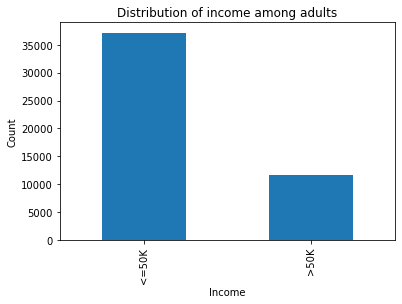

In [12]:
df.income.value_counts().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of income among adults')
plt.show()

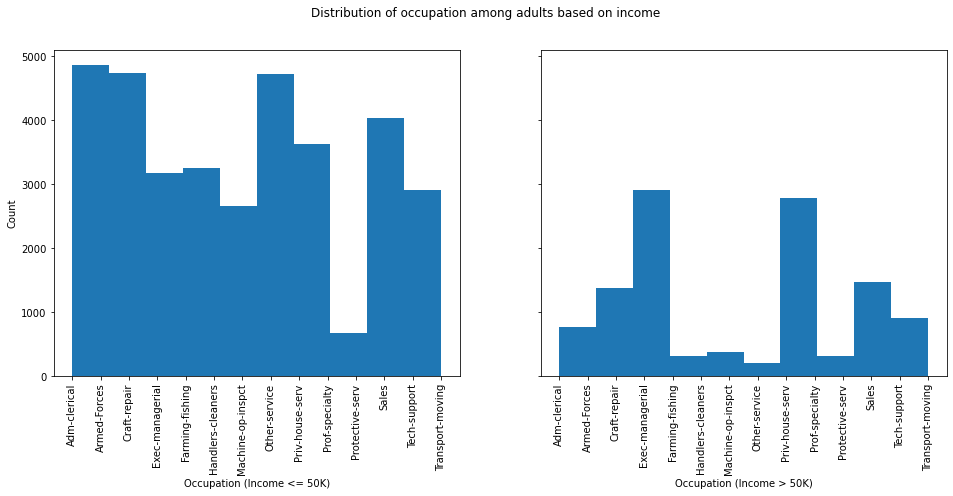

In [13]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('occupation').occupation[df.occupation != '?'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Occupation (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('occupation').occupation[df.occupation != '?'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Occupation (Income > 50K)')
f.suptitle('Distribution of occupation among adults based on income')
plt.show()

In [14]:
df[['education','educational-num']].groupby('education').mean().sort_values('educational-num')

,educational-num
education,
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


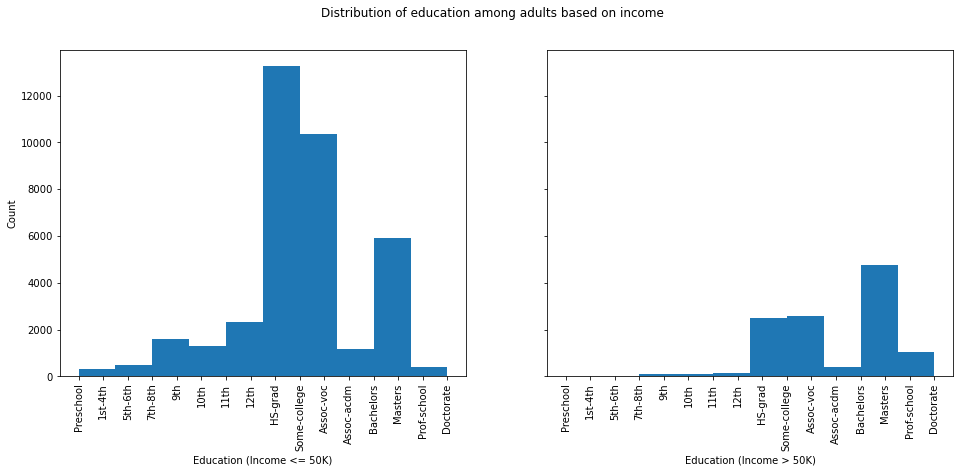

In [15]:
df['education'] = pd.Categorical(df['education'], ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
'11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 
'Doctorate'])
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values("education").education)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Education (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values("education").education)
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Education (Income > 50K)')
f.suptitle('Distribution of education among adults based on income')
plt.show()

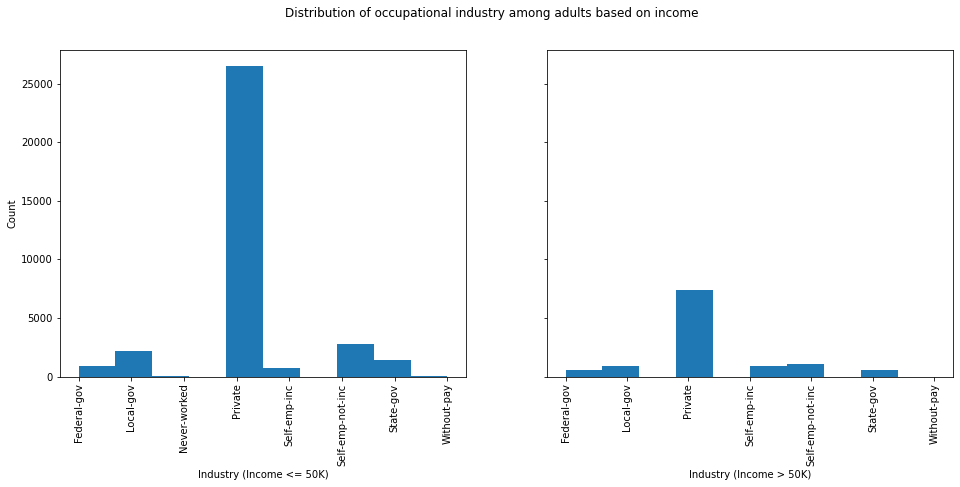

In [16]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('workclass').workclass[df.workclass != '?'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Industry (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('workclass').workclass[df.workclass != '?'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Industry (Income > 50K)')
f.suptitle('Distribution of occupational industry among adults based on income')
plt.show()

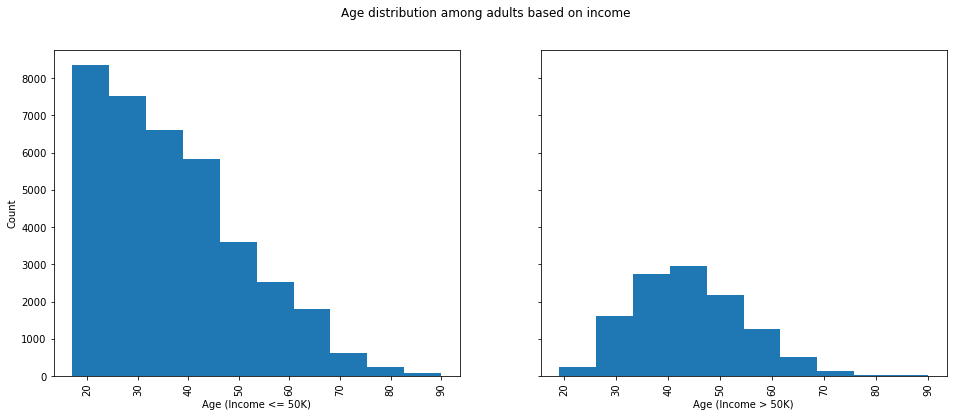

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('age').age)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Age (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('age').age)
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Age (Income > 50K)')
f.suptitle('Age distribution among adults based on income')
plt.show()

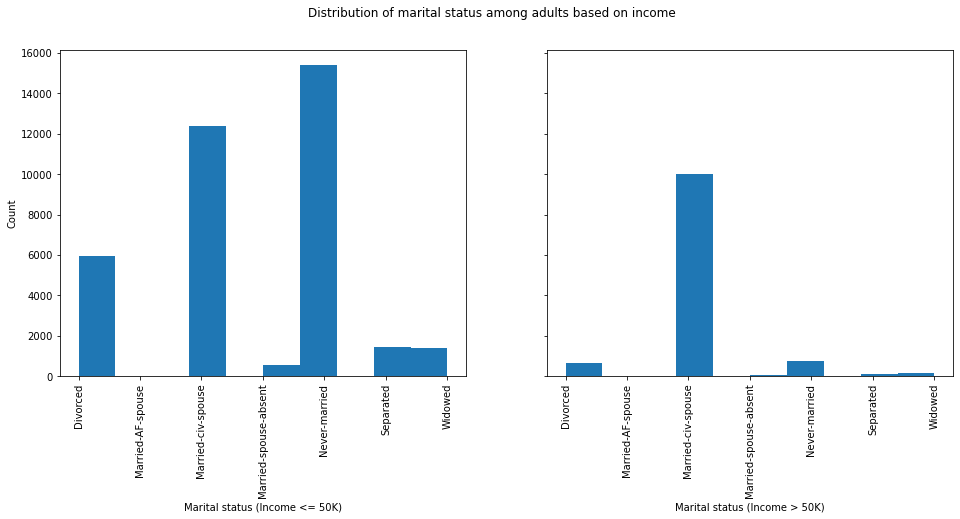

In [18]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('marital-status')['marital-status'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Marital status (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('marital-status')['marital-status'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Marital status (Income > 50K)')
f.suptitle('Distribution of marital status among adults based on income')
plt.show()

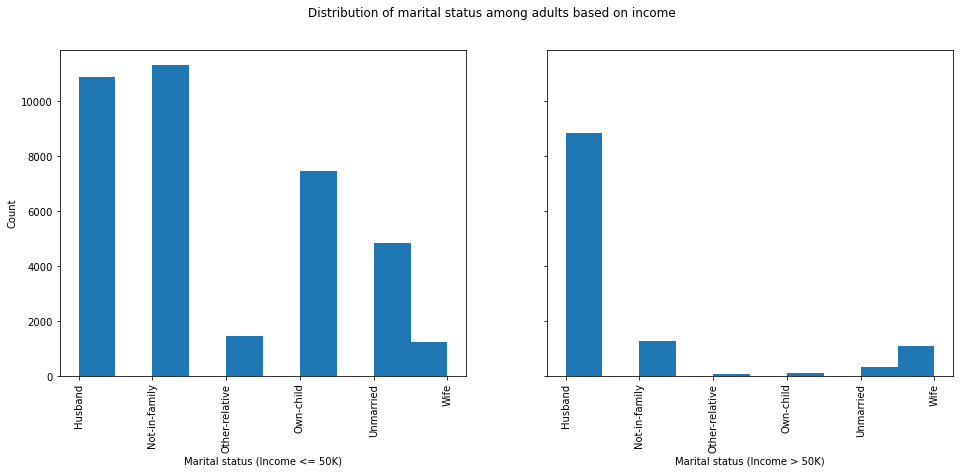

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('relationship')['relationship'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Marital status (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('relationship')['relationship'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Marital status (Income > 50K)')
f.suptitle('Distribution of marital status among adults based on income')
plt.show()

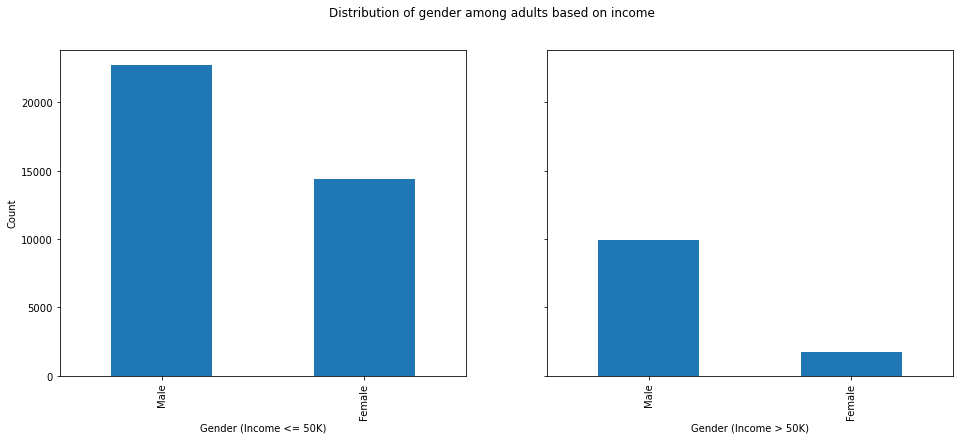

In [20]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6), sharey=True)
df[df.income == '<=50K']['gender'].value_counts().plot(kind='bar', ax=ax1)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Gender (Income <= 50K)')
ax1.set_ylabel('Count')
df[df.income == '>50K']['gender'].value_counts().plot(kind='bar', ax=ax2)
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Gender (Income > 50K)')
f.suptitle('Distribution of gender among adults based on income')
plt.show()

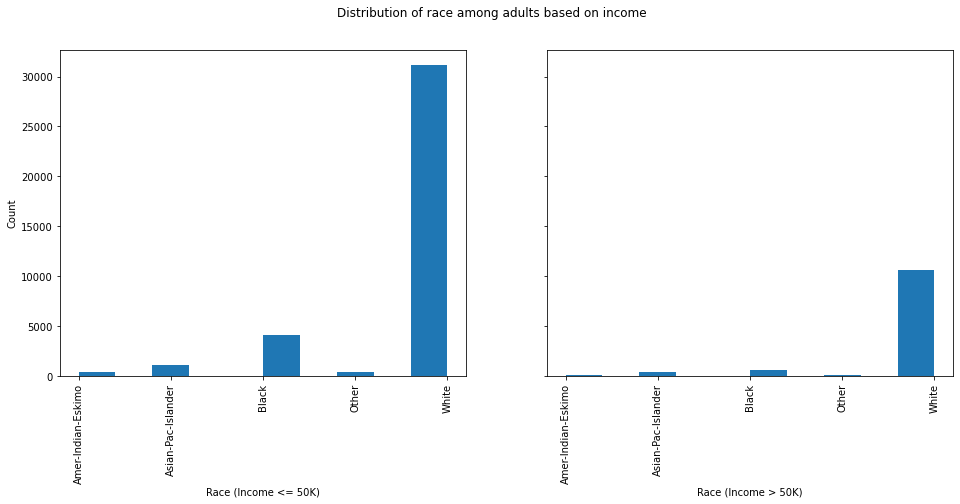

In [21]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('race')['race'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Race (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('race')['race'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Race (Income > 50K)')
f.suptitle('Distribution of race among adults based on income')
plt.show()

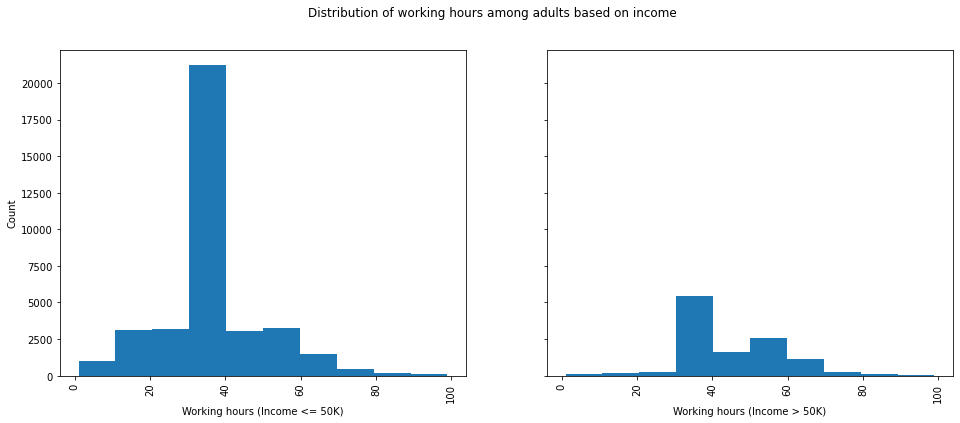

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6),sharey=True)
ax1.hist(df[df.income == '<=50K'].sort_values('hours-per-week')['hours-per-week'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('Working hours (Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('hours-per-week')['hours-per-week'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Working hours (Income > 50K)')
f.suptitle('Distribution of working hours among adults based on income')
plt.show()

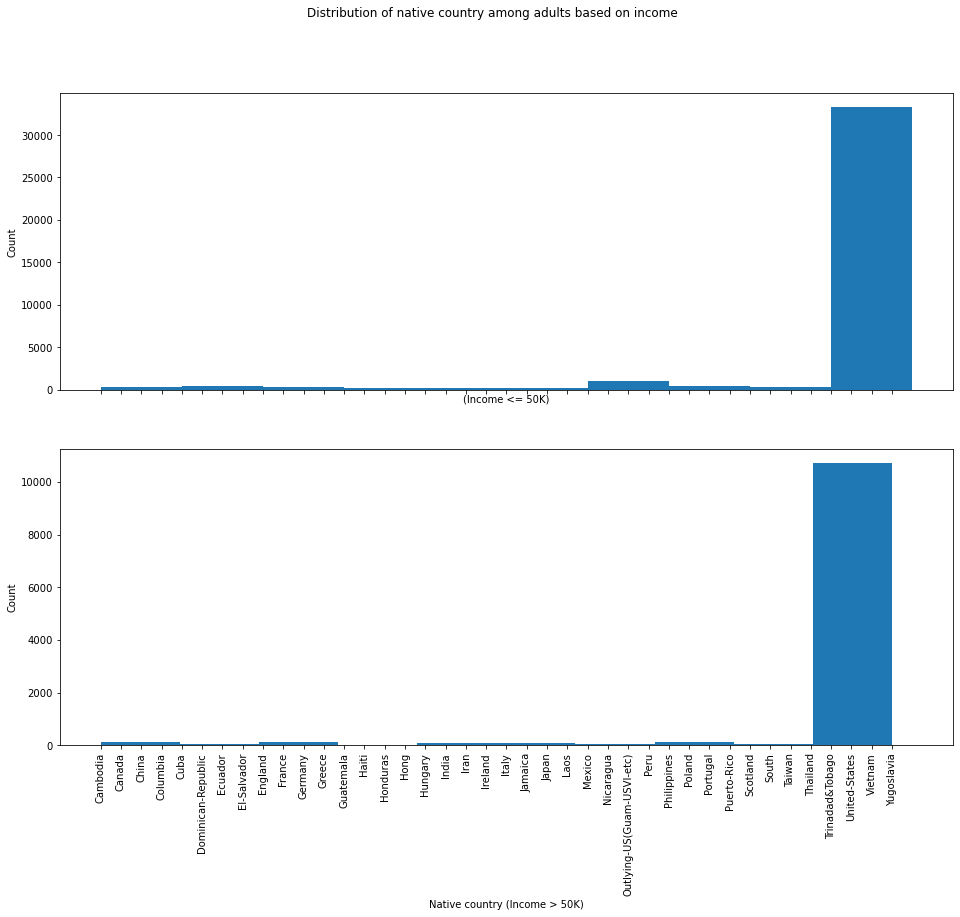

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
ax1.hist(df[df.income == '<=50K'].sort_values('native-country')['native-country'][df['native-country'] != '?'])
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel('(Income <= 50K)')
ax1.set_ylabel('Count')
ax2.hist(df[df.income == '>50K'].sort_values('native-country')['native-country'][df['native-country'] != '?'])
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel('Native country (Income > 50K)')
ax2.set_ylabel('Count')
f.suptitle('Distribution of native country among adults based on income')
plt.show()